In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchvision.transforms as transforms
from PIL import Image

In [4]:
#read the csv
#column Breed shows the y with the image name
data_csv = pd.read_csv('dataset_CV.csv')
data_csv

,DogId,Breed,Image,ImageNumber
0,6673,SIBERIAN HUSKY,4d924d95-de4c-43c0-a586-9fb19cadf905.jpg,1
1,6673,SIBERIAN HUSKY,851cc9ee-fc4d-430c-99f6-6425b8bbbe6b.jpg,2
2,6673,SIBERIAN HUSKY,7d055dfa-dc6f-4f2b-a7be-dc8bc666836f.jpg,3
3,6673,SIBERIAN HUSKY,f1f55f0a-c3d6-442b-b686-71b83b510dc5.jpg,4
4,6671,SIBERIAN HUSKY,a2e49a61-7c6a-46f0-a80e-9f32e596c1df.jpg,1
...,...,...,...,...
4145,38513,BORDER COLLIE,e3957a7c-9289-4441-bdbd-d2289bef745d.jpg,5
4146,38513,BORDER COLLIE,48afd0ab-baf2-4ee8-9584-9563cec529e7.jpg,6
4147,38513,BORDER COLLIE,8f8c4ea0-7426-4188-bb6c-94fa1ecb1e33.jpg,7
4148,38513,BORDER COLLIE,cce5499f-eb04-4d8c-8d3f-c9c9bee16c5c.jpg,8


In [5]:
# read the images
# some images are broken, so we just pass them for now
location = r"dog_breed_photos"
df = []
for image in data_csv['Image']:
    try:
        df.append(Image.open(Path(location) / image))
    except IOError:
        print(image + " does not exist")
        pass

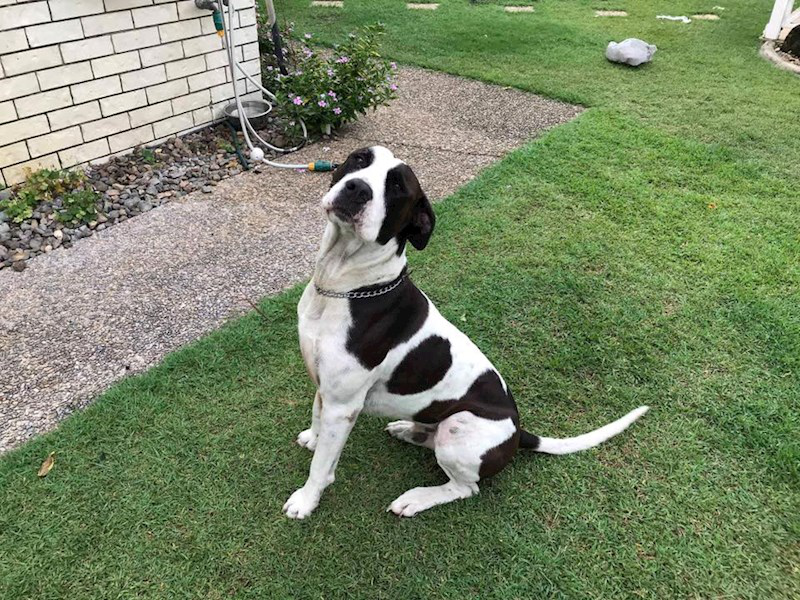

In [6]:
# little check
df[42]

In [7]:
# use augmix
#shows 4 images as example
augmenter = transforms.AugMix()
augmented_images = [augmenter(df[42]) for _ in range(4)]

#probleme beim anzeigen

In [8]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = df[42]
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [ ]:
plot(augmented_images)